Plot the following things, then write some text --

1. Plot endeffector coordinates, joint coordinates, muscle coordinates and spindle coordinates
2. Plot pen-tip trajectories length vs modified trajectories length per label
3. Plot muscle jerks per label
4. Plot latent variable distributions per class

In [1]:
import h5py
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with h5py.File('./data/pcr_trajectories.hdf5', 'r') as f:
    pentip_trajectories = f['trajectories'][()]
    pentip_labels = f['labels'][()]

In [3]:
with h5py.File('./data/pcr_dataset_train.hdf5', 'r') as f:
    labels_train = f['label'][()]
    planes_train = f['plane'][()]
    startpts_train = f['startpt'][()]
    size_train = f['size'][()]
    rot_train = f['rot'][()]
    shear_x_train = f['shear_x'][()]
    shear_y_train = f['shear_y'][()]
    speed_train = f['speed'][()]
    noise_train = f['noise'][()]
    length_chars_train = f['start_id'][()] - f['end_id'][()]

In [4]:
with h5py.File('./data/pcr_dataset_test.hdf5', 'r') as f:
    labels_test = f['label'][()]
    planes_test = f['plane'][()]
    startpts_test = f['startpt'][()]
    size_test = f['size'][()]
    rot_test = f['rot'][()]
    shear_x_test = f['shear_x'][()]
    shear_y_test = f['shear_y'][()]
    speed_test = f['speed'][()]
    noise_test = f['noise'][()]
    length_chars_test = f['start_id'][()] - f['end_id'][()]

In [5]:
length = lambda x : sum(~np.isnan(x[0]))
pentip_lengths = np.array([length(traj) for traj in pentip_trajectories])

In [6]:
char_labels = ['a', 'b', 'c', 'd', 'e', 'g', 'h', 'l', 'm', 'n',
               'o', 'p', 'q', 'r', 's', 'u', 'v', 'w', 'y', 'z']

**Duration of characters.**

In [7]:
pentip_df = pd.DataFrame({'labels': pentip_labels, 'lengths': pentip_lengths})

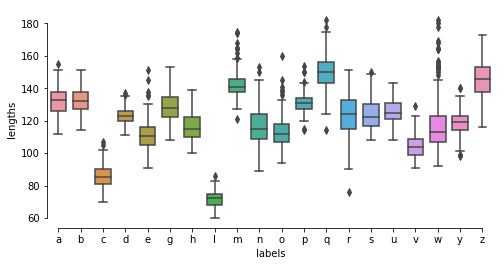

In [10]:
plt.figure(figsize=[8, 4])
sns.boxplot(x='labels', y='lengths', data=pentip_df, width=0.7)
plt.xticks(np.arange(20), char_labels)
sns.despine(trim=True)

In [11]:
type_id = np.concatenate((np.repeat('train', 160000), np.repeat('test', 40000)))
fulldata_lengths = np.concatenate((length_chars_train, length_chars_test))
fulldata_labels = np.concatenate((labels_train, labels_test))
lengths_df = pd.DataFrame({'type': type_id, 'labels': fulldata_labels, 'lengths': -fulldata_lengths})

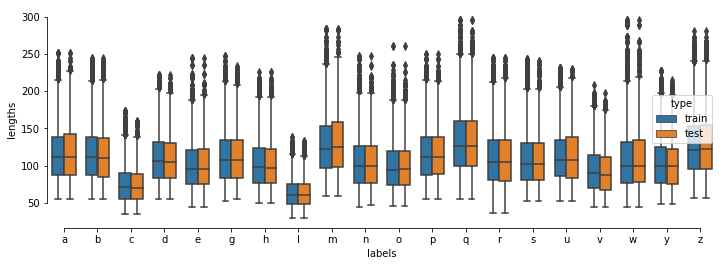

In [12]:
plt.figure(figsize=[12, 4])
sns.boxplot(x='labels', y='lengths', hue='type', data=lengths_df, width=0.7)
plt.xticks(np.arange(20), char_labels)
sns.despine(trim=True)

**Jerk in muscle configurations.**

In [13]:
import sys
sys.path.append('/gpfs01/bethge/home/pmamidanna/deep_proprioception/code/')

from pcr_data_utils import compute_jerk

In [15]:
with h5py.File('./data/pcr_dataset_train.hdf5') as trainfile:
    muscleconf = trainfile['muscle_coords'][()]
    
muscle_jerks_train = np.array([compute_jerk(traj) for traj in muscleconf])

with h5py.File('./data/pcr_dataset_test.hdf5') as testfile:
    muscleconf = testfile['muscle_coords'][()]
    
muscle_jerks_test = np.array([compute_jerk(traj) for traj in muscleconf])

del muscleconf

In [16]:
jerks = np.concatenate((muscle_jerks_train, muscle_jerks_test))
jerks_df = pd.DataFrame({'type': type_id, 'labels': fulldata_labels, 'jerks': jerks})

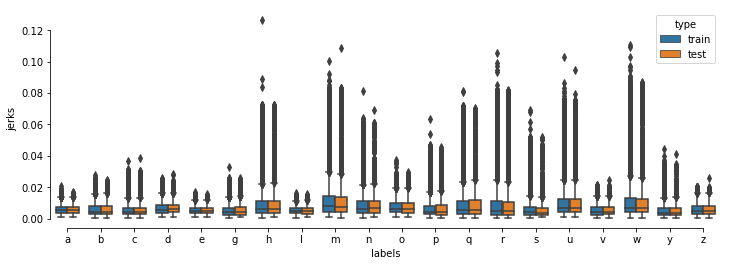

In [17]:
plt.figure(figsize=[12, 4])
sns.boxplot(x='labels', y='jerks', hue='type', data=jerks_df, width=0.7)
plt.xticks(np.arange(20), char_labels)
sns.despine(trim=True)

**Latent Variable distributions per label.**